In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pickle
import nltk
from nltk import *
from sklearn import tree
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.kernel_approximation import RBFSampler
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import accuracy_score, hamming_loss
from sklearn.metrics import f1_score, classification_report
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.linear_model import RidgeClassifier
from sklearn.neural_network import MLPClassifier
from time import time
import numpy as np
import matplotlib.pyplot as plt
from numpy import random
from scipy.stats import randint as sp_randint
import xgboost

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

def pickle_file(filename, obj):
    with open('dumps/' + filename, 'wb') as f:
        pickle.dump(obj, f)


def unpickle_file(filename):
    with open('dumps/' + filename, 'rb') as f:
        return pickle.load(f)
    
def preprocess(text):
# Remove punctuation, stopword and then stemmering
    stop = set(stopwords.words("english"))
    stemmer = stem.PorterStemmer()
    punctuation = set(string.punctuation)

    doc = [stemmer.stem(word) for word in nltk.word_tokenize(text) if (word not in punctuation) and (word not in stop)]

    doc = ' '.join(w for w in doc)
    return doc

def hamming_score(y_true, y_pred, normalize=True, sample_weight=None):
    '''
    Compute the Hamming score (a.k.a. label-based accuracy) for the multi-label case
    http://stackoverflow.com/q/32239577/395857
    '''
    acc_list = []
    for i in range(y_true.shape[0]):
        set_true = set( np.where(y_true[i])[0] )
        set_pred = set( np.where(y_pred[i])[0] )
        tmp_a = None
        if len(set_true) == 0 and len(set_pred) == 0:
            tmp_a = 1
        else:
            tmp_a = len(set_true.intersection(set_pred))/\
                    float( len(set_true.union(set_pred)) )
        #print('tmp_a: {0}'.format(tmp_a))
        acc_list.append(tmp_a)
    return np.mean(acc_list)
    

In [7]:
data_train = pd.read_csv('data_train.csv', encoding='utf-8')

data_train["Summary"] = data_train["Summary"].apply(preprocess)

summaries_train = data_train['Summary'].as_matrix()

ydf = data_train.drop('Summary', axis = 1)
ydf = ydf.drop(ydf.columns[0], axis = 1)
ydf = ydf.drop(ydf.columns[0], axis = 1)
ydf = ydf.as_matrix()

tfidfVect = TfidfVectorizer()
tfidf = tfidfVect.fit_transform(summaries_train)

pickle_file('tfidf.dat', tfidf)
pickle_file('tfidf_vocab.dat', tfidfVect.vocabulary_)
pickle_file('ydf.dat', ydf)



In [2]:
tfidf_vocab = TfidfVectorizer(decode_error="replace",vocabulary=unpickle_file('tfidf_vocab.dat'))
tfidf_train = unpickle_file('tfidf.dat')
ydf = unpickle_file('ydf.dat')
X_train = tfidf_train
y_train = ydf

In [3]:
def train_linear_svc(features_train, labels_train):
    print ("Training linear SVC")
    clf = LinearSVC(C=1, dual=True, class_weight='balanced')
    clf = OneVsRestClassifier(clf).fit(features_train, labels_train)
    return clf


def train_randomForest(features_train, labels_train):
    print ("Training random forest")
    clf = RandomForestClassifier(n_estimators=70, max_depth=70)
    clf = OneVsRestClassifier(clf).fit(features_train, labels_train)
    return clf

def train_decisionTree(features_train, labels_train):
    print ("Training decision tree")
    clf = tree.DecisionTreeClassifier()
    clf = OneVsRestClassifier(clf).fit(features_train, labels_train)
    return clf

def train_adaboost_decision_tree(features_train, labels_train):
    print ("Training adaboost decision tree")
    clf = AdaBoostClassifier( tree.DecisionTreeClassifier(max_depth=5),
                              n_estimators=600,
                              learning_rate=1)
    clf = OneVsRestClassifier(clf).fit(features_train, labels_train)
    return clf

def train_SGD_l1(features_train, labels_train):
    print ("Training SGD l1")
    clf = SGDClassifier(alpha=.0001, n_iter=50, penalty="l1")
    clf = OneVsRestClassifier(clf).fit(features_train, labels_train)
    return clf
                        
def train_SGD_l2(features_train, labels_train):
    print ("Training SGD l2")
    clf = SGDClassifier(alpha=.0001, n_iter=50, penalty="l2")
    clf = OneVsRestClassifier(clf).fit(features_train, labels_train)
    return clf

def train_SGD_elasticnet(features_train, labels_train):
    print ("Training SGD elascticnet")
    clf = SGDClassifier(alpha=.0001, n_iter=50, penalty="elasticnet")
    clf = OneVsRestClassifier(clf).fit(features_train, labels_train)
    return clf

def train_PassiveAggressiveClassifier(features_train, labels_train):
    print ("Training PassiveAggressiveClassifier")
    clf = PassiveAggressiveClassifier(n_iter=50)
    clf = OneVsRestClassifier(clf).fit(features_train, labels_train)
    return clf

def train_RidgeClassifier(features_train, labels_train):
    print ("Training RidgeClassifier")
    clf = RidgeClassifier(tol=1e-2, solver="sag")
    clf = OneVsRestClassifier(clf).fit(features_train, labels_train)
    return clf

def train_KNeighborsClassifier(features_train, labels_train):
    print ("Training KNeighborsClassifier")
    clf = KNeighborsClassifier(n_neighbors=10)
    clf = OneVsRestClassifier(clf).fit(features_train, labels_train)
    return clf

def train_MultinomialNB(features_train, labels_train):
    print ("Training MultinomialNB")
    clf = MultinomialNB(alpha=.01)
    clf = OneVsRestClassifier(clf).fit(features_train, labels_train)
    return clf

def train_BernoulliNB(features_train, labels_train):
    print ("Training BernoulliNB")
    clf = BernoulliNB(alpha=.01)
    clf = OneVsRestClassifier(clf).fit(features_train, labels_train)
    return clf

def train_MLP(features_train, labels_train):
    print ("Training MLP")
    clf = MLPClassifier(random_state=0, max_iter=400)
    clf = OneVsRestClassifier(clf).fit(features_train, labels_train)
    return clf

def train_NearestCentroid(features_train, labels_train):
    print ("Training NearestCentroid")
    clf = NearestCentroid()
    clf = OneVsRestClassifier(clf).fit(features_train, labels_train)
    return clf

def train_xgboost(features_train, labels_train):
    print ("Training xgboost")
    clf = xgboost.XGBClassifier()
    clf = OneVsRestClassifier(clf).fit(features_train, labels_train)
    return clf
    
    
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")
            

def grid_search_forest(X, y):
    clf = RandomForestClassifier(n_estimators=70)

    # Utility function to report best scores
 
    # use a full grid over all parameters
    param_grid = {"max_depth": [3, None],
                  "max_features": [1, 3, 10],
                  "min_samples_split": [2, 3, 4, 5, 10],
                  "min_samples_leaf": [1, 3, 10],
                  "bootstrap": [True, False],
                  "criterion": ["gini", "entropy"]}

    # run grid search
    grid_search = GridSearchCV(clf, param_grid=param_grid)
    start = time()
    grid_search.fit(X, y)

    print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
          % (time() - start, len(grid_search.cv_results_['params'])))
    report(grid_search.cv_results_)

                        

In [4]:
data_test = pd.read_csv('data_test.csv', encoding='utf-8')

data_test["Summary"] = data_test["Summary"].apply(preprocess)

summaries_test = data_test['Summary'].as_matrix()

transformer = TfidfTransformer()
tfidf_test = transformer.fit_transform(tfidf_vocab.fit_transform(summaries_test))
pickle_file('tfidf_test.dat', tfidf_test)
# tfidf_test = unpickle_file('tfidf_test.dat')
X_test = tfidf_test


ydf_test = pd.read_csv('labels_test.csv', encoding='utf-8')
target_names = list(ydf_test.columns.values)
del target_names[0]
ydf_test = ydf_test.drop(ydf_test.columns[0], axis = 1)
ydf_test = ydf_test.as_matrix()
pickle_file('ydf_test.dat', ydf_test)
# ydf_test = unpickle_file('ydf_test.dat')

In [5]:
draw_roc_tab = []

def benchmark(clf, name):  
    t0 = time()
    pred = clf.predict(X_test)
    test_time = time() - t0
    print("test time:  %0.3fs" % test_time)
    
    score_hamming = hamming_score(ydf_test, pred)    
    f1_micro = f1_score(ydf_test, pred, average="micro")
    f1_macro = f1_score(ydf_test, pred, average="macro")
    f1_weighted = f1_score(ydf_test, pred, average="weighted")
    f1_samples = f1_score(ydf_test, pred, average="samples")
    
    print('F1-Score with micro compute: {0}'.format(f1_micro))
    print('F1-Score with macro compute: {0}'.format(f1_macro))
    print('F1-Score with weighted compute: {0}'.format(f1_weighted))
    print('F1-Score with samples compute: {0}'.format(f1_samples))
    print('Hamming score: {0}'.format(score_hamming))
    print "\n"
    print classification_report(ydf_test, pred, target_names=target_names)
    
    draw_roc_tab.append((ydf_test, pred))
    return name, score_hamming, f1_micro, f1_macro, f1_weighted, f1_samples



def draw_ROC(y_test_and_y_score_list):
    """ y_test_and_y_score: une liste de y_test et y_score.
        [(y_test, y_score), (y_test, y_score),...]
        y_test est label réal
        y_score est label prédit 
       """
    import numpy as np
    import matplotlib.pyplot as plt
    from itertools import cycle
    from sklearn.metrics import roc_curve, auc
    from scipy import interp
    for y_test, y_score in y_test_and_y_score_list:
        n_classes = y_score.shape[1]
        # Compute ROC curve and ROC area for each class
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])
        # Compute micro-average ROC curve and ROC area
        fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
        roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
        # Compute macro-average ROC curve and ROC area
        # First aggregate all false positive rates
        all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
        # Then interpolate all ROC curves at this points
        mean_tpr = np.zeros_like(all_fpr)
        for i in range(n_classes):
            mean_tpr += interp(all_fpr, fpr[i], tpr[i])
        # Finally average it and compute AUC
        mean_tpr /= n_classes
        fpr["macro"] = all_fpr
        tpr["macro"] = mean_tpr
        roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

        # Plot all ROC curves
        plt.figure()
        plt.plot(fpr["micro"], tpr["micro"],
                 label='micro-average ROC curve (area = {0:0.2f})'
                       ''.format(roc_auc["micro"]),
                 color='deeppink', linestyle=':', linewidth=4)

        plt.plot(fpr["macro"], tpr["macro"],
                 label='macro-average ROC curve (area = {0:0.2f})'
                       ''.format(roc_auc["macro"]),
                 color='navy', linestyle=':', linewidth=4)

        #for i in range(n_classes):
        #    plt.plot(fpr[i], tpr[i], lw=2,
        #    label='ROC curve of {0} (area = {1:0.2f})'
        #             ''.format(data.columns.values[i+2], roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic to multi-labels')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()

results = []

In [6]:
print y_train.shape
print ydf_test.shape
#svm_classifier_linear = train_linear_svc(X_train, y_train)
pickle_file('svm_classifier_linear', svm_classifier_linear)
svm_classifier_linear = unpickle_file('svm_classifier_linear')
results.append(benchmark(svm_classifier_linear, 'svm_classifier_linear'))

(15000L, 16L)
(19152L, 16L)


NameError: name 'svm_classifier_linear' is not defined

In [ ]:
# random_forest = train_randomForest(X_train, y_train)
# pickle_file('random_forest', random_forest)
random_forest = unpickle_file('random_forest')
results.append(benchmark(random_forest, 'random_forest'))

In [7]:
# decision_tree = train_decisionTree(X_train, y_train)
# pickle_file('decision_tree', decision_tree)
decision_tree = unpickle_file('decision_tree')
results.append(benchmark(decision_tree, 'decision_tree'))

NameError: global name 'X_test' is not defined

In [22]:
# adaboost_decision_tree = train_adaboost_decision_tree(X_train, y_train)
# pickle_file('adaboost_decision_tree', adaboost_decision_tree)
adaboost_decision_tree = unpickle_file('adaboost_decision_tree')
results.append(benchmark(adaboost_decision_tree, 'adaboost_decision_tree'))

test time:  147.556s
F1-Score with micro compute: 0.480448455018
F1-Score with macro compute: 0.365703422257
F1-Score with weighted compute: 0.449378042291
F1-Score with samples compute: 0.452330136157
Hamming score: 0.378803262289


                 precision    recall  f1-score   support

          drama       0.70      0.73      0.71     11088
         action       0.53      0.36      0.43      3786
      adventure       0.51      0.32      0.39      3435
      animation       0.71      0.38      0.50      1376
          crime       0.56      0.29      0.39      2825
        fantasy       0.47      0.11      0.18      1227
          music       0.46      0.12      0.18      1519
        musical       0.48      0.09      0.15      1374
        mystery       0.45      0.09      0.16      1171
        romance       0.48      0.19      0.27      3759
science fiction       0.78      0.39      0.52      1313
          sport       0.73      0.19      0.31       359
       thriller       0.

In [7]:
# import os

# mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-6.1.0-posix-seh-rt_v5-rev0\\mingw64\\bin'

# os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']

xgboost = train_xgboost(X_train, y_train)
pickle_file('xgboost', SGD_l1)
#SGD_l1 = unpickle_file('SGD_l1.dat')
results.append(benchmark(xgboost, 'xgboost'))

Training xgboost


WindowsError: [Error -1073741784] Windows Error 0xC0000028

In [ ]:
 SGD_l1 = train_SGD_l1(X_train, y_train)
# pickle_file('SGD_l1.dat', SGD_l1)
SGD_l1 = unpickle_file('SGD_l1.dat')
results.append(benchmark(SGD_l1, 'SGD_l1'))

In [24]:
# SGD_l2 = train_SGD_l2(X_train, y_train)
# pickle_file('SGD_l2', SGD_l2)
SGD_l2 = unpickle_file('SGD_l2')
results.append(benchmark(SGD_l2, 'SGD_l2'))

test time:  0.135s
F1-Score with micro compute: 0.475217376594
F1-Score with macro compute: 0.29351102611
F1-Score with weighted compute: 0.404026368884
F1-Score with samples compute: 0.470139028277
Hamming score: 0.406827274038


                 precision    recall  f1-score   support

          drama       0.73      0.82      0.78     11088
         action       0.74      0.24      0.37      3786
      adventure       0.75      0.16      0.27      3435
      animation       0.90      0.41      0.56      1376
          crime       0.73      0.17      0.27      2825
        fantasy       0.78      0.06      0.10      1227
          music       0.69      0.03      0.06      1519
        musical       0.48      0.01      0.01      1374
        mystery       0.77      0.03      0.05      1171
        romance       0.69      0.07      0.13      3759
science fiction       0.90      0.33      0.48      1313
          sport       0.89      0.11      0.19       359
       thriller       0.74 

In [25]:
# SGD_elasticnet = train_SGD_elasticnet(X_train, y_train)
# pickle_file('SGD_elasticnet', SGD_elasticnet)
SGD_elasticnet = unpickle_file('SGD_elasticnet')
results.append(benchmark(SGD_elasticnet, 'SGD_elasticnet'))

test time:  0.132s
F1-Score with micro compute: 0.450837670084
F1-Score with macro compute: 0.240158996613
F1-Score with weighted compute: 0.363353960098
F1-Score with samples compute: 0.453388182758
Hamming score: 0.392154244739


                 precision    recall  f1-score   support

          drama       0.73      0.85      0.78     11088
         action       0.75      0.19      0.30      3786
      adventure       0.76      0.10      0.17      3435
      animation       0.90      0.35      0.50      1376
          crime       0.74      0.13      0.23      2825
        fantasy       0.78      0.01      0.03      1227
          music       0.76      0.01      0.02      1519
        musical       1.00      0.00      0.00      1374
        mystery       0.77      0.02      0.04      1171
        romance       0.69      0.04      0.08      3759
science fiction       0.89      0.28      0.43      1313
          sport       0.90      0.08      0.14       359
       thriller       0.76

In [26]:
# PassiveAggressiveClassifier = train_PassiveAggressiveClassifier(X_train, y_train)
# pickle_file('PassiveAggressiveClassifier', PassiveAggressiveClassifier)
PassiveAggressiveClassifier = unpickle_file('PassiveAggressiveClassifier')
results.append(benchmark(PassiveAggressiveClassifier, 'PassiveAggressiveClassifier'))

test time:  0.137s
F1-Score with micro compute: 0.508222900849
F1-Score with macro compute: 0.442624915593
F1-Score with weighted compute: 0.496948820326
F1-Score with samples compute: 0.480752397607
Hamming score: 0.399455463228


                 precision    recall  f1-score   support

          drama       0.71      0.70      0.70     11088
         action       0.52      0.41      0.46      3786
      adventure       0.50      0.37      0.42      3435
      animation       0.73      0.59      0.65      1376
          crime       0.48      0.36      0.41      2825
        fantasy       0.48      0.25      0.33      1227
          music       0.38      0.21      0.27      1519
        musical       0.36      0.19      0.25      1374
        mystery       0.34      0.18      0.23      1171
        romance       0.42      0.30      0.35      3759
science fiction       0.76      0.49      0.60      1313
          sport       0.70      0.31      0.43       359
       thriller       0.51

In [27]:
# RidgeClassifier = train_RidgeClassifier(X_train, y_train)
# pickle_file('RidgeClassifier', RidgeClassifier)
RidgeClassifier = unpickle_file('RidgeClassifier')
results.append(benchmark(RidgeClassifier, 'RidgeClassifier'))

test time:  0.128s
F1-Score with micro compute: 0.48360058309
F1-Score with macro compute: 0.325053320334
F1-Score with weighted compute: 0.429529522045
F1-Score with samples compute: 0.469433918792
Hamming score: 0.405206592871


                 precision    recall  f1-score   support

          drama       0.73      0.79      0.76     11088
         action       0.70      0.26      0.38      3786
      adventure       0.68      0.22      0.33      3435
      animation       0.89      0.40      0.55      1376
          crime       0.69      0.20      0.31      2825
        fantasy       0.69      0.10      0.18      1227
          music       0.59      0.06      0.11      1519
        musical       0.49      0.04      0.07      1374
        mystery       0.65      0.05      0.08      1171
        romance       0.64      0.14      0.23      3759
science fiction       0.90      0.33      0.48      1313
          sport       0.88      0.13      0.22       359
       thriller       0.69 

In [28]:
# KNeighborsClassifier = train_KNeighborsClassifier(X_train, y_train)
# pickle_file('KNeighborsClassifier', KNeighborsClassifier)
KNeighborsClassifier = unpickle_file('KNeighborsClassifier')
results.append(benchmark(KNeighborsClassifier, 'KNeighborsClassifier'))

test time:  443.472s
F1-Score with micro compute: 0.369524688837
F1-Score with macro compute: 0.18547164774
F1-Score with weighted compute: 0.296399804083
F1-Score with samples compute: 0.359102327578
Hamming score: 0.309147206641


                 precision    recall  f1-score   support

          drama       0.67      0.70      0.68     11088
         action       0.60      0.10      0.17      3786
      adventure       0.60      0.09      0.15      3435
      animation       0.82      0.35      0.49      1376
          crime       0.55      0.05      0.09      2825
        fantasy       0.60      0.02      0.04      1227
          music       0.56      0.02      0.04      1519
        musical       0.48      0.02      0.03      1374
        mystery       0.63      0.03      0.06      1171
        romance       0.38      0.07      0.11      3759
science fiction       0.87      0.14      0.24      1313
          sport       0.78      0.06      0.11       359
       thriller       0.4

In [29]:
# MultinomialNB = train_MultinomialNB(X_train, y_train)
# pickle_file('MultinomialNB', MultinomialNB)
MultinomialNB = unpickle_file('MultinomialNB')
results.append(benchmark(MultinomialNB, 'MultinomialNB'))

test time:  0.341s
F1-Score with micro compute: 0.491204474943
F1-Score with macro compute: 0.3596302038
F1-Score with weighted compute: 0.451709673349
F1-Score with samples compute: 0.474200769932
Hamming score: 0.40447847877


                 precision    recall  f1-score   support

          drama       0.71      0.79      0.75     11088
         action       0.57      0.33      0.42      3786
      adventure       0.57      0.33      0.42      3435
      animation       0.81      0.52      0.63      1376
          crime       0.53      0.17      0.26      2825
        fantasy       0.57      0.19      0.28      1227
          music       0.34      0.12      0.17      1519
        musical       0.32      0.12      0.17      1374
        mystery       0.44      0.06      0.11      1171
        romance       0.45      0.18      0.26      3759
science fiction       0.74      0.39      0.51      1313
          sport       0.70      0.11      0.19       359
       thriller       0.55   

In [30]:
# BernoulliNB = train_BernoulliNB(X_train, y_train)
# pickle_file('BernoulliNB', BernoulliNB)
BernoulliNB = unpickle_file('BernoulliNB')
results.append(benchmark(BernoulliNB, 'BernoulliNB'))

test time:  0.791s
F1-Score with micro compute: 0.560657617114
F1-Score with macro compute: 0.473421708913
F1-Score with weighted compute: 0.553767874972
F1-Score with samples compute: 0.534866890686
Hamming score: 0.444961802504


                 precision    recall  f1-score   support

          drama       0.72      0.85      0.78     11088
         action       0.55      0.48      0.51      3786
      adventure       0.47      0.52      0.49      3435
      animation       0.64      0.58      0.61      1376
          crime       0.58      0.43      0.49      2825
        fantasy       0.31      0.46      0.37      1227
          music       0.36      0.28      0.32      1519
        musical       0.33      0.28      0.30      1374
        mystery       0.38      0.27      0.32      1171
        romance       0.48      0.54      0.51      3759
science fiction       0.45      0.54      0.49      1313
          sport       0.84      0.30      0.45       359
       thriller       0.48

In [31]:
# MLP = train_MLP(X_train, y_train)
# pickle_file('MLP', MLP)
MLP = unpickle_file('MLP')
results.append(benchmark(MLP, 'MLP'))

test time:  4.757s
F1-Score with micro compute: 0.517804323094
F1-Score with macro compute: 0.44055615873
F1-Score with weighted compute: 0.502280078974
F1-Score with samples compute: 0.491664952575
Hamming score: 0.411214440698


                 precision    recall  f1-score   support

          drama       0.72      0.72      0.72     11088
         action       0.54      0.41      0.47      3786
      adventure       0.52      0.37      0.43      3435
      animation       0.75      0.60      0.66      1376
          crime       0.49      0.34      0.40      2825
        fantasy       0.52      0.23      0.32      1227
          music       0.39      0.18      0.25      1519
        musical       0.36      0.16      0.22      1374
        mystery       0.41      0.16      0.24      1171
        romance       0.45      0.30      0.36      3759
science fiction       0.77      0.48      0.59      1313
          sport       0.69      0.23      0.35       359
       thriller       0.54 

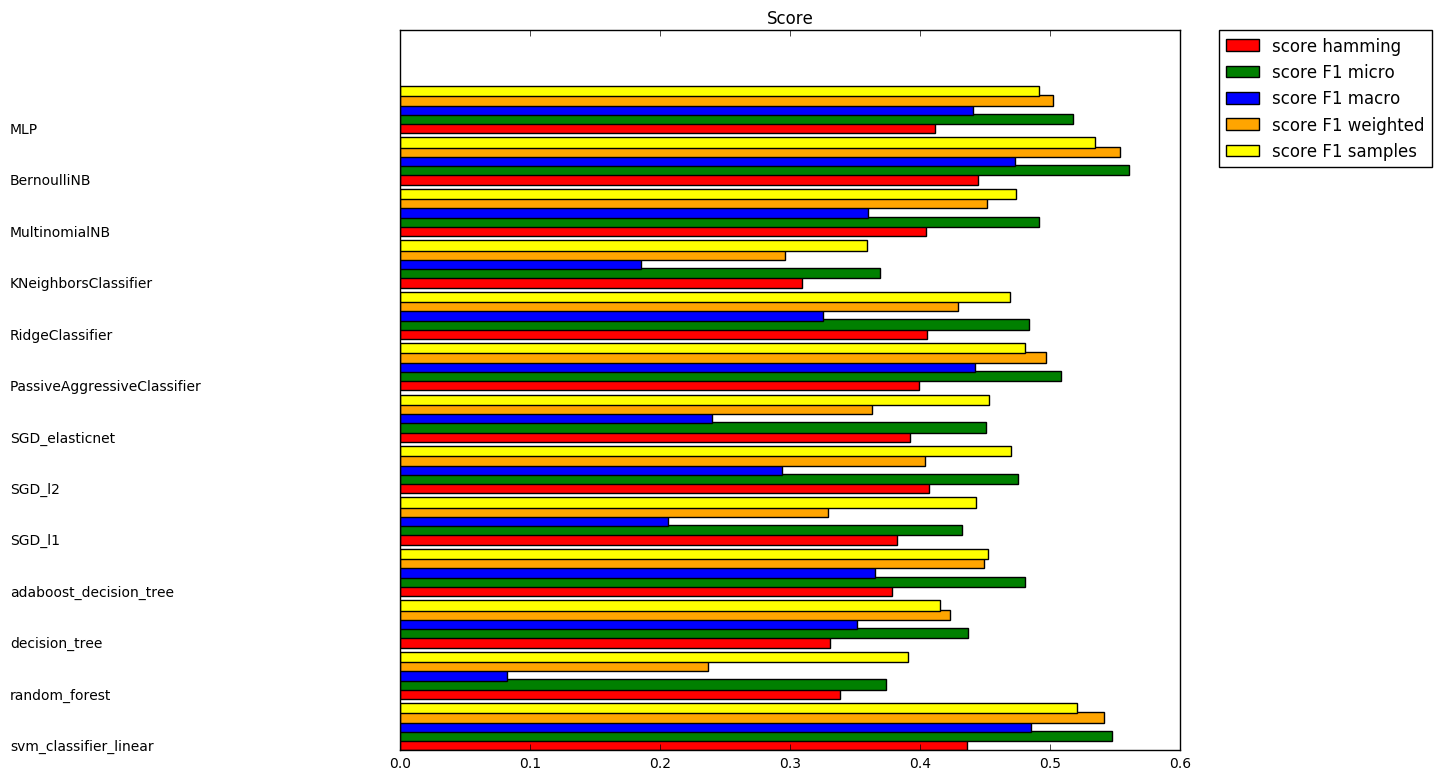

In [55]:
%matplotlib inline

indices = np.arange(len(results))

results_final = [[x[i] for x in results] for i in range(6)]
width = 0.18  
clf_names, score_hamming,f1_micro, f1_macro, f1_weighted, f1_samples = results_final
# test_time = np.array(test_time) / np.max(test_time)

plt.figure(figsize=(12, 8))
plt.title("Score")
plt.barh(indices, score_hamming, .2, label="score hamming", color='red')
plt.barh(indices + width, f1_micro, .2, label="score F1 micro", color='green')
plt.barh(indices + 2*width, f1_macro, .2, label="score F1 macro", color='blue')
plt.barh(indices + 3*width, f1_weighted, .2, label="score F1 weighted", color='orange')
plt.barh(indices + 4*width, f1_samples, .2, label="score F1 samples", color='yellow')
# plt.barh(indices + .6, test_time, .2, label="test time", color='darkorange')
plt.yticks(())
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.subplots_adjust(left=.25)
plt.subplots_adjust(top=.95)
plt.subplots_adjust(bottom=.05)

for i, c in zip(indices, clf_names):
    plt.text(-.3, i, c)

plt.show()